In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
#needed to import qke procedures
import sys
from pathlib import Path

main_dir = str(Path().resolve().parent)
sys.path.insert(1, main_dir)

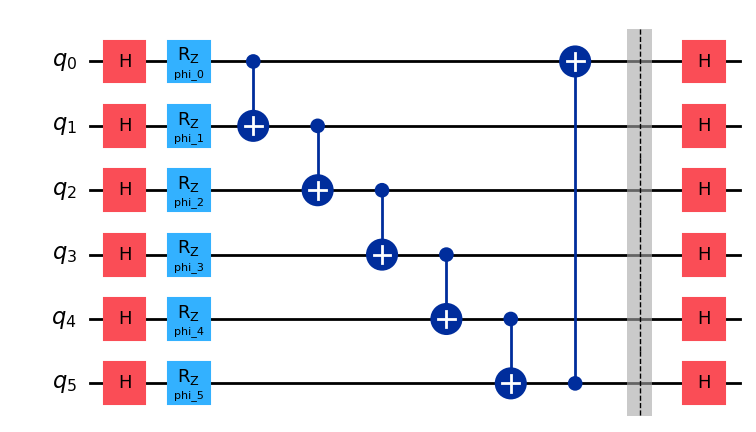

In [24]:
from qke.Circuits import Circuits

q_template = Circuits.ansatz_encoded(6)
q_template.draw('mpl')

In [25]:
#load dataset with panda
#data are scaled outside the notebook
import pandas as pd

env = pd.read_csv('../data/env.sel3.scaled.csv')  
X = env[['illuminance', 'blinds','lamps','rh', 'co2', 'temp']]

In [26]:
X_value = X.values[0]
print(X_value)


[-0.99277374  1.          0.          0.40689999 -1.00177691 -0.06102718]


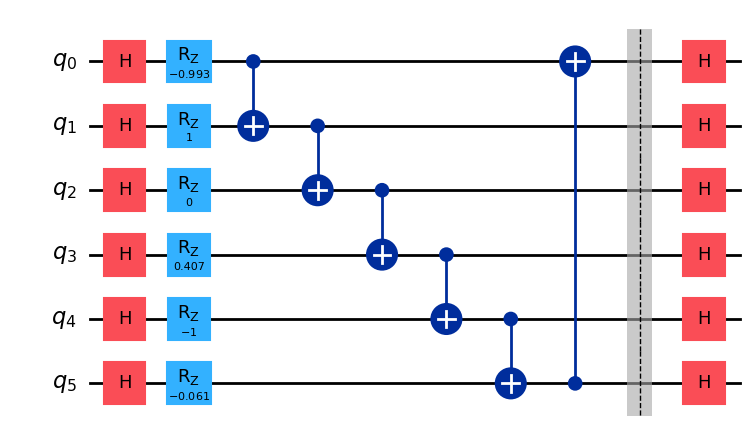

In [27]:
from qke.qkernel import qEncoding

my_q_assigned = qEncoding(q_template, X_value)
my_q_assigned.draw('mpl')

In [28]:
from qke.QMeasures import QMeasures

#try evaluatin function
a = QMeasures.Aer(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'], nshots = 4)
b = QMeasures.PrimitiveEstimator(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'], nshots = 'fdf' )
c = QMeasures.StateVectorEstimator(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])

print(type(a))
print(a)
print(b)
print(c)

<class 'numpy.ndarray'>
[0.2946548  0.5378032  0.49481384 0.91835211 0.54030231 0.29520434]
[0.28507616 0.48981485 0.56195215 0.84897773 0.62862732 0.26806359]
[0.2946548  0.5378032  0.49481384 0.91835211 0.54030231 0.29520434]


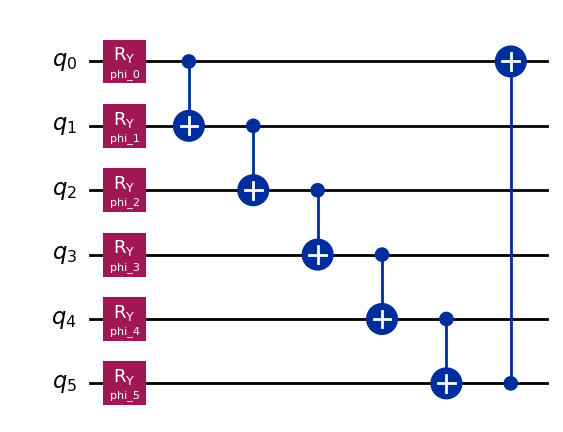

In [29]:
q_template_polar = Circuits.y_encoded(6)
q_template_polar.draw('mpl')

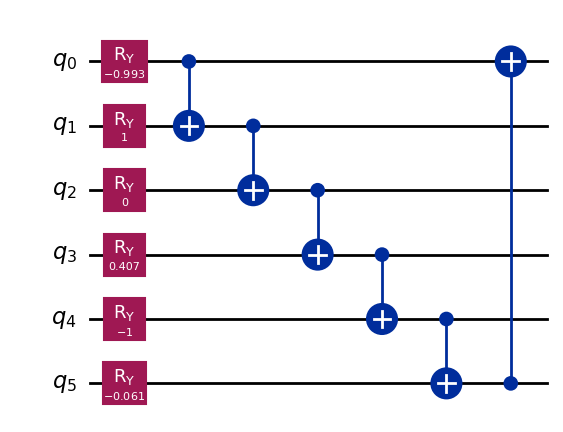

In [30]:
my_q_assigned_p = qEncoding(q_template_polar,X_value)
my_q_assigned_p.draw('mpl')

In [31]:
a_ = QMeasures.Aer(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
b_ = QMeasures.PrimitiveEstimator(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
c_ = QMeasures.StateVectorEstimator(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])

In [32]:
print(a_)
print(b_)
print(c_)

[0.14579927 0.14607119 0.27110153 0.29520434 0.29520434 0.26685137]
[ 0.07474545 -0.00672831  0.13906978  0.38563013  0.2862248   0.21552683]
[0.14579927 0.14607119 0.27110153 0.29520434 0.29520434 0.26685137]


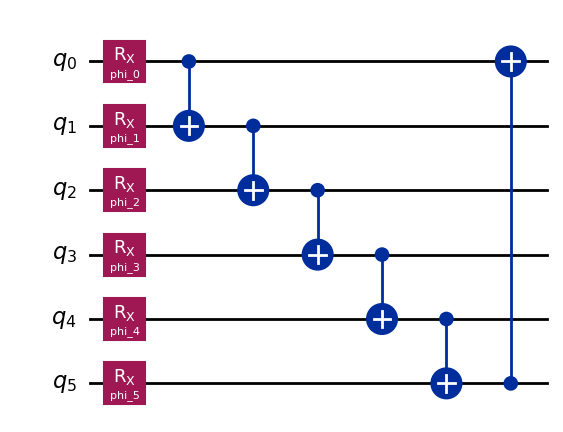

In [33]:
#try circuit X
x_enconding = Circuits.x_encoded(n_wire= 6)
x_enconding.draw('mpl')

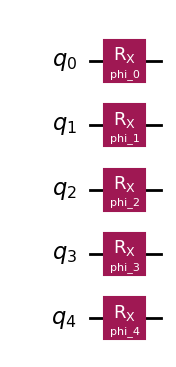

In [34]:
ss = Circuits.x_encoded(n_wire=5, full_ent=False)
ss.draw('mpl')

In [38]:
from qiskit.quantum_info import Operator
import numpy as np



op = Operator.from_label('ZXIZIY')
op_np = op.to_matrix()

#print(op_np)

res = np.linalg.eig(op_np)

print(res.eigenvalues.shape)
print(res.eigenvalues)





(64,)
[ 1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j
  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j
  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j
  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j]


In [36]:
f = {'a': 4,'b': 7}

for i, (k,v) in enumerate(f.items()):
    print(k,v)

a 4
b 7


In [41]:
from qke.CircuitContainer import CircuitContainer
from qke.QMeasures import QMeasures
c_zz = CircuitContainer(qtemplate=Circuits.zzfeaturemap, nwire=6, obs=['ZIIIII'], measure_fn=QMeasures.StateVectorEstimator)
c_zz.metadata()

*** Create a Container ***
*** Quantum template for feature map using 6 qubit ***
     ┌──────────────────────────────────────────────┐
q_0: ┤0                                             ├
     │                                              │
q_1: ┤1                                             ├
     │                                              │
q_2: ┤2                                             ├
     │  ZZFeatureMap(x[0],x[1],x[2],x[3],x[4],x[5]) │
q_3: ┤3                                             ├
     │                                              │
q_4: ┤4                                             ├
     │                                              │
q_5: ┤5                                             ├
     └──────────────────────────────────────────────┘
*** Required observables: ['ZIIIII']
*** Measure procedure: StateVectorEstimator
*** Quantum template for feature map using 6 qubit ***
     ┌──────────────────────────────────────────────┐
q_0: ┤0                   

''

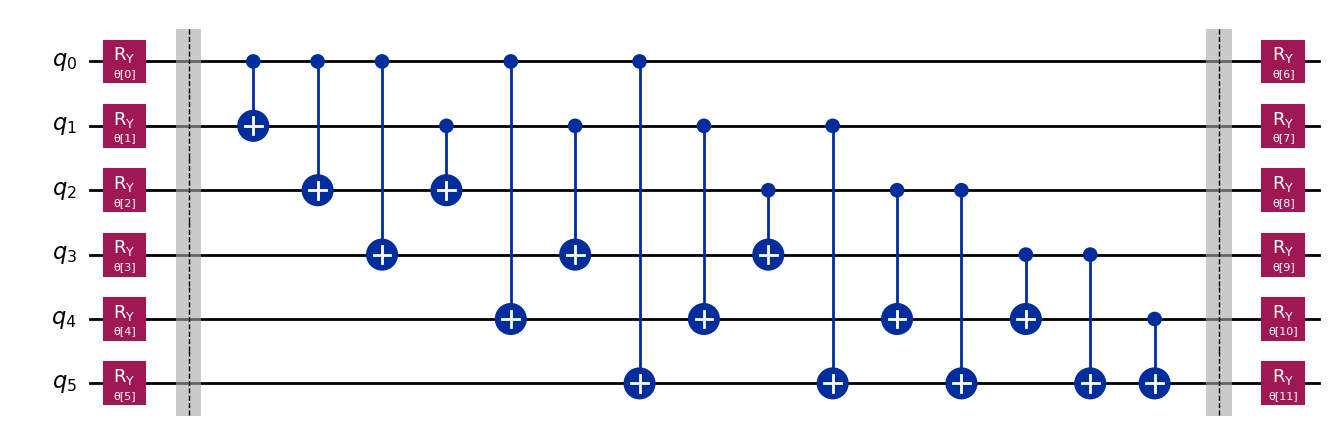

Numbers of layers: 12


In [43]:
from qiskit.circuit.library import TwoLocal

n_qubits = 6
n_layers = 1
#circuit = TwoLocal(n_qubits, 'ry', 'cx', 'linear', reps=n_layers)
twl = TwoLocal(n_qubits, 
                   rotation_blocks='ry', 
                   entanglement_blocks='cx', 
                   entanglement='full', 
                   reps=n_layers, 
                   insert_barriers=True, skip_final_rotation_layer=False)

display(twl.decompose().draw('mpl'))


num_pars = len(twl.parameters)
print(f'Numbers of layers: {num_pars}')




In [ ]:
np.random.normal(loc=0.0, scale=1.0, size=5)

array([-0.83752709, -1.06869708, -0.30470971, -1.01490855, -0.96512096])

In [111]:
#from sklearn.metrics.pairwise import linear_kernel as l
from sklearn.metrics.pairwise import rbf_kernel
#from sklearn.metrics.pairwise import pairwise_kernels
#from sklearn.metrics.pairwise import linear_kernel
from CKernels import CKernels


x = np.array([1,2]) 
y = np.array([2,3]) 
z = np.array([x,y]) 

print(z)
print(rbf_kernel(z))
print(CKernels.)






[[1 2]
 [2 3]]
[[1.         0.36787944]
 [0.36787944 1.        ]]


0.3678794411714422

In [83]:
from qke.CKernels import CKernels
print(CKernels.linear(x,y))
print(CKernels.rbf(x,y))

print(x.dot(x))


[[8.]]
[[0.36787944]]


ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)